In [2]:
pip install scapy


Note: you may need to restart the kernel to use updated packages.


In [3]:
from scapy.all import rdpcap
from scapy.layers.inet import TCP, IP
import numpy as np
import matplotlib.pyplot as plt

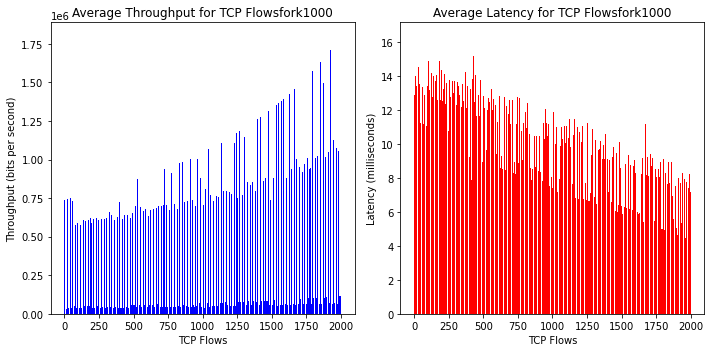

In [6]:

def calculate_throughput(packets):
    if len(packets) < 2:
        return 0 

    total_bytes = sum(len(packet) * 8 for packet in packets)
    duration = packets[-1].time - packets[0].time
    return total_bytes / duration



def calculate_latency(packets):
    if len(packets) < 2:
        return 0
    return np.mean([(float(packets[i].time) - float(packets[i - 1].time)) * 1000 for i in range(1, len(packets))])


l=["fork1000_"]

for i in l:
    
    packets = rdpcap(i+'.pcapng')
    
    # Dictionary to store TCP flows and their packets
    tcp_flows = {}

    
    for packet in packets:
        if TCP in packet and IP in packet:
            flow_key = (
                packet[IP].src,
                packet[IP].dst,
                packet[TCP].sport,
                packet[TCP].dport
            )
            if flow_key not in tcp_flows:
                tcp_flows[flow_key] = []
            tcp_flows[flow_key].append(packet)

    # average throughput and latency for each TCP flow
    throughputs = []
    latencies = []

    for flow_key, packets in tcp_flows.items():
        throughput = calculate_throughput(packets)
        latency = calculate_latency(packets)
        throughputs.append(throughput)
        latencies.append(latency)

    
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.bar(range(len(throughputs)), throughputs, color='blue')
    plt.xlabel('TCP Flows')
    plt.ylabel('Throughput (bits per second)')
    plt.title('Average Throughput for TCP Flows'+i)

    plt.subplot(1, 2, 2)
    plt.bar(range(len(latencies)), latencies, color='red')
    plt.xlabel('TCP Flows')
    plt.ylabel('Latency (milliseconds)')
    plt.title('Average Latency for TCP Flows'+i)

    plt.tight_layout()
    plt.savefig(i+'_plot.jpg', format='jpg')
    plt.show()

